In [9]:
import numpy as np
from math import sqrt
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from evaluacion_funciones import * # pip install graphviz

In [10]:
# Carga de datos.
dataset = datasets.load_boston()
X = dataset.data
y = dataset.target
print(np.shape(X))
print(X)

(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [11]:
# Métricas de evaluación.
metricas = {
  'MAE': metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2': metrics.r2_score}

In [12]:
# Algoritmos de aprendizaje.
k = 10
reg = KNeighborsRegressor(n_neighbors = k)

In [13]:
# Validación y obtención de las predicciones del modelo.
y_pred = cross_val_predict(reg, X, y, cv = KFold(n_splits=10, random_state=42, shuffle=True))

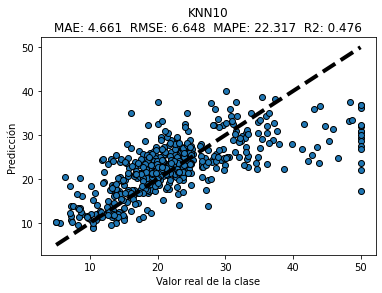

In [14]:
# Evaluación y presentación de resultados.
results = evaluacion(y, y_pred, metricas)
grafica_real_vs_pred(y, y_pred, results, "KNN"+str(k))